<a href="https://colab.research.google.com/github/KoMurase/Learn_NLP/blob/master/SIGNATE_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I tried spam judgement of SIGNATE.

参考:

https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

In [0]:
path = '/content/drive/My Drive/SIGNATE_spam/'

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


In [0]:
train_master = pd.read_table(path + 'train_master.tsv')

In [0]:
sample = pd.read_table(path + 'sample_submit.csv', sep=',')
sample.columns=['file_name', 'label']

In [107]:
sample

,file_name,label
0,test_0001.txt,1
1,test_0002.txt,0
2,test_0003.txt,1
3,test_0004.txt,0
4,test_0005.txt,0
...,...,...
2580,test_2581.txt,0
2581,test_2582.txt,1
2582,test_2583.txt,1
2583,test_2584.txt,0


In [52]:
train_master.head(2)

,file_name,label
0,train_0000.txt,0
1,train_0001.txt,0


In [53]:
sample.head(2)

,file_name,label
0,test_0001.txt,1
1,test_0002.txt,0


In [0]:
#!unzip '/content/drive/My Drive/SIGNATE_spam/train.zip' -d '/content/drive/My Drive/SIGNATE_spam/train/'

In [0]:
#!unzip '/content/drive/My Drive/SIGNATE_spam/test.zip' -d '/content/drive/My Drive/SIGNATE_spam/test/'

In [0]:
import os, glob
import gc 

In [0]:
def read_file(filename):
  words = []
  with open(filename, 'rt', encoding='utf-8') as f:
    text = f.read()
  
  return text


In [0]:
def make_text_column(dir,df):
  print(filename)
  file = glob.glob(dir + filename +'.txt' )
  for f in file:
    text = read_file(f) 
  df['text'] = text

  return df

In [0]:
filenames = []
for i in train_master['file_name']:
  filenames.append(i)

In [0]:
test_filenames = []
for i in sample['file_name']:
  test_filenames.append(i)

In [0]:
texts = []
train_dir = '/content/drive/My Drive/SIGNATE_spam/train/train2/'

for filename in filenames:
  with open(train_dir + filename ,'rt', encoding='utf-8') as f:
    text = f.read()
  
    texts.append(text)

In [0]:
test_texts = []
test_dir = '/content/drive/My Drive/SIGNATE_spam/test/test2/'

for filename in test_filenames:
  with open(test_dir + filename ,'rt', encoding='utf-8') as f:
    test_text = f.read()
  
    test_texts.append(test_text)

In [37]:
texts[0]


'Subject: re : buyback / deficiency deals worksheet\nthe equistar deal 156337 is the sale and swing all in one . i only have two\ndeals for this counterparty , one for the sale and one for the buyback .\nfrom : robert e lloyd 04 / 05 / 2000 02 : 23 pm\nto : julie meyers / hou / ect @ ect\ncc : pat clynes / corp / enron @ enron , daren j farmer / hou / ect @ ect , robert e\nlloyd / hou / ect @ ect\nsubject : buyback / deficiency deals worksheet\nplease make the following changes and redistribute your worksheet . thanks\n!\n1 ) . please update equistar " swing " sitara ticket # as : 156337 . equistar\n" sale " should reflect\n" various " due to the different deals associated with this\ncounterparty .\n2 ) . valero marketing & supply " undertake " sitara ticket # \' s are as follows :\nmtr . 981394 . . . . 148396\nmtr . 988018 . . . . 148381\nmtr . 981233 . . . . 148388\n3 ) . valero marketing\n981233 . . . 148384 ; 988018 . . . 148376'

In [40]:
train_text = pd.DataFrame(texts)
train_text.head()

,0
0,Subject: re : buyback / deficiency deals works...
1,Subject: fw : stress relief\n- - - - - origina...
2,"Subject: from mrs . juliana\ndear friend ,\npl..."
3,Subject: [ wrenches ] 68 % off dreamweaver mx ...
4,Subject: y 2 k - texas log\nname home pager\ng...


In [0]:
train_text = train_text.rename(columns={0:'text'})

In [0]:
train = pd.concat([train_master,train_text], axis=1)

In [44]:
gc.collect()

630

In [60]:
test_text_df = pd.DataFrame(test_texts)
test_text_df.head()

,0
0,Subject: potential list fo 9 / 00\ndaren :\npe...
1,Subject: bounce skel @ iit . demokritos . gr :...
2,Subject: hpl meter # 981488 paris tenaska hpl\...
3,"Subject: hpl nom for august 3 , 2000\n( see at..."
4,Subject: re : sos ! re : aep is missing 3 deal...


In [0]:
train_text_df = test_text_df.rename(columns={0:'text'})

In [62]:
train_text_df

,text
0,Subject: potential list fo 9 / 00\ndaren :\npe...
1,Subject: bounce skel @ iit . demokritos . gr :...
2,Subject: hpl meter # 981488 paris tenaska hpl\...
3,"Subject: hpl nom for august 3 , 2000\n( see at..."
4,Subject: re : sos ! re : aep is missing 3 deal...
...,...
2580,Subject: neuro tests start january 23 th\nchro...
2581,Subject: is this fri feb 11 a problem for taki...
2582,"Subject: enron / hpl actuals for june 6 , 2000..."
2583,Subject: hpl nomination changes for july 25 an...


In [0]:
test = pd.concat([sample,train_text_df], axis=1)

In [64]:
test

,file_name,label,text
0,test_0001.txt,1,Subject: potential list fo 9 / 00\ndaren :\npe...
1,test_0002.txt,0,Subject: bounce skel @ iit . demokritos . gr :...
2,test_0003.txt,1,Subject: hpl meter # 981488 paris tenaska hpl\...
3,test_0004.txt,0,"Subject: hpl nom for august 3 , 2000\n( see at..."
4,test_0005.txt,0,Subject: re : sos ! re : aep is missing 3 deal...
...,...,...,...
2580,test_2581.txt,0,Subject: neuro tests start january 23 th\nchro...
2581,test_2582.txt,1,Subject: is this fri feb 11 a problem for taki...
2582,test_2583.txt,1,"Subject: enron / hpl actuals for june 6 , 2000..."
2583,test_2584.txt,0,Subject: hpl nomination changes for july 25 an...


In [65]:
gc.collect()

453

In [66]:
train.head()

,file_name,label,text
0,train_0000.txt,0,Subject: re : buyback / deficiency deals works...
1,train_0001.txt,0,Subject: fw : stress relief\n- - - - - origina...
2,train_0002.txt,1,"Subject: from mrs . juliana\ndear friend ,\npl..."
3,train_0003.txt,1,Subject: [ wrenches ] 68 % off dreamweaver mx ...
4,train_0004.txt,0,Subject: y 2 k - texas log\nname home pager\ng...


In [67]:
from collections import Counter
# spam:1, nonspam:0
train.groupby('label')['text'].apply(lambda x: Counter(' '.join(x).split(' ')).most_common(n=30)).iloc[1]

[('.', 7123),
 (',', 4822),
 ('-', 3428),
 ('the', 3127),
 ('/', 2418),
 ('to', 2277),
 ('and', 2112),
 ('of', 2059),
 (':', 1919),
 ('a', 1686),
 ('in', 1429),
 ('=', 1318),
 ('you', 1184),
 ('is', 1112),
 ('for', 1018),
 ("'", 906),
 ('this', 871),
 ('your', 799),
 ('Subject:', 747),
 ('|', 723),
 ('?', 682),
 ('s', 675),
 ('with', 668),
 ('$', 666),
 ('be', 629),
 ('that', 627),
 ('(', 619),
 (';', 611),
 ('or', 576),
 ('on', 558)]

In [71]:
train.groupby('label')['text'].apply(lambda x: Counter(' '.join(x).split(' ')).most_common(n=30)).iloc[0]

[('-', 36344),
 ('/', 18457),
 (',', 13451),
 ('.', 12859),
 (':', 9028),
 ('the', 8218),
 ('to', 6040),
 ('ect', 5911),
 ('@', 5743),
 ('hou', 3698),
 ('for', 3666),
 ('and', 3665),
 ('>', 2952),
 ('a', 2878),
 ('on', 2774),
 ('of', 2723),
 ('enron', 2659),
 ('you', 2451),
 ('is', 2347),
 ('in', 2169),
 ('this', 2104),
 ('i', 2079),
 ("'", 2022),
 ('Subject:', 1839),
 ('be', 1835),
 ('will', 1662),
 ('(', 1620),
 ('that', 1582),
 ('2000', 1547),
 ('have', 1511)]

In [70]:
train[train['label']==1]['text'].iloc[0]

"Subject: from mrs . juliana\ndear friend ,\nplease don ' t be surprised to receive this letter from me since we do\nnot know each other before now . i am mrs . juliana mbuluku makele , the\nwife of late tate makele , a farmer in zimbabwe who was\nmurdered in the land dispute in my country . i got your contact through\nnetwork online hence decided to write you .\nbefore the death of my husband , he made a deposit with a security firm .\nthe consignment was declared to contain gem stones shipped on\ndiplomatic\ncover to avoid customs detecting the actual contents . the actual\ncontent is the sum of us 25 . 5 million ( twenty five million , five\nhundred\nthousand united states dollars only ) . this was done when he noticed\nthe\nlooming danger in zimbabwe on land policies . the security company does\nnot know\nthe actual contents of the two - box out of the ten trunk boxes /\nconsignment as it was not disclosed to them for security reasons .\nthis mount was meant for the purchase of new

Text(0.5, 0, 'Percent of label 1 is 28.886%')

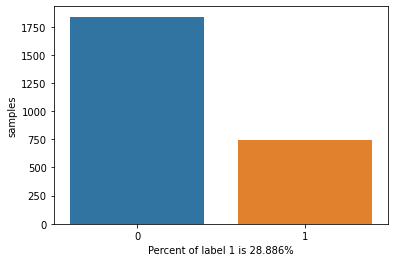

In [81]:
x = train['label'].value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')
plt.gca().set_xlabel('Percent of label 1 is {:.3f}%'.format(100 * (train['label'].value_counts()[1] / train['label'].value_counts().sum())))

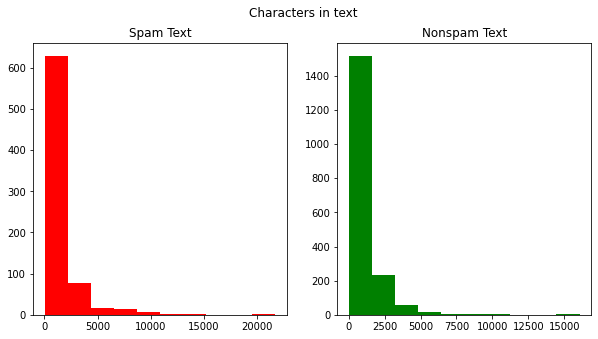

In [83]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
spam_len=train[train['label']==1]['text'].str.len()

ax1.hist(spam_len,color='red')
ax1.set_title('Spam Text')

nonspam_len=train[train['label']==0]['text'].str.len()

ax2.hist(nonspam_len,color='green')
ax2.set_title('Nonspam Text')
fig.suptitle('Characters in text')
plt.show()

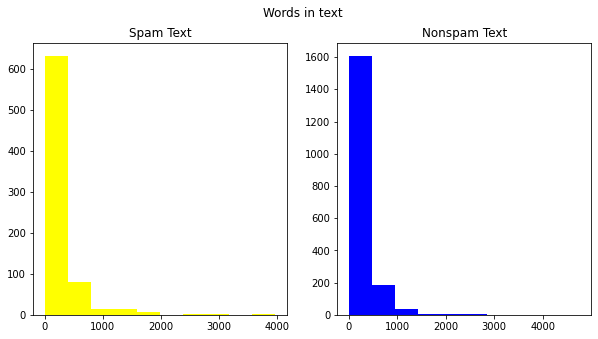

In [85]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
spam_len=train[train['label']==1]['text'].str.split().map(lambda x: len(x))

ax1.hist(spam_len,color='yellow')
ax1.set_title('Spam Text')

nonspam_len=train[train['label']==0]['text'].str.split().map(lambda x: len(x))

ax2.hist(nonspam_len,color='blue')
ax2.set_title('Nonspam Text')
fig.suptitle('Words in text')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

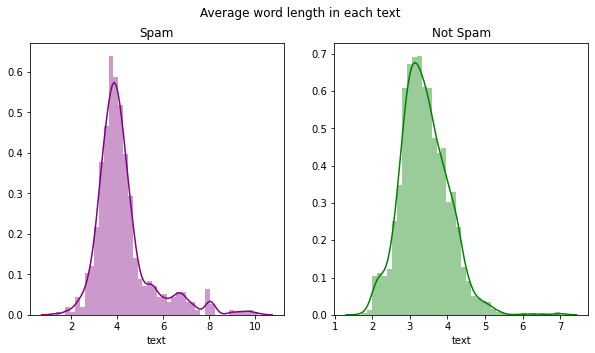

In [88]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='purple')
ax1.set_title('Spam')
word=train[train['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not Spam')

fig.suptitle('Average word length in each text')

In [0]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [0]:
count_vectorizer = feature_extraction.text.CountVectorizer()

train_vectors = count_vectorizer.fit_transform(train["text"])

test_vectors = count_vectorizer.transform(test["text"])

In [0]:
clf = linear_model.RidgeClassifier()


In [100]:
clf.fit(train_vectors, train["label"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [101]:
scores = model_selection.cross_val_score(clf, train_vectors, train["label"], cv=3, scoring="f1")
scores

array([0.83685221, 0.82116788, 0.85931559])

In [120]:
sample = pd.read_table(path + 'sample_submit.csv', sep=',')
sample['1']

0       1
1       0
2       1
3       0
4       0
       ..
2580    0
2581    1
2582    1
2583    0
2584    0
Name: 1, Length: 2585, dtype: int64

In [125]:
clf.predict(test_vectors)

array([0, 1, 0, ..., 0, 0, 0])

In [121]:
sample['1'] = clf.predict(test_vectors)
sample

,test_0000.txt,1
0,test_0001.txt,0
1,test_0002.txt,1
2,test_0003.txt,0
3,test_0004.txt,0
4,test_0005.txt,0
...,...,...
2580,test_2581.txt,1
2581,test_2582.txt,0
2582,test_2583.txt,0
2583,test_2584.txt,0


In [0]:
sample.to_csv('sub_Ridge.csv', index=False)

In [0]:
sub = test.drop('text',axis=1)
sub = sub.rename(columns={'file_name':})
sub.to_csv('sub_Ridge1.csv', index = False,header=None)

In [111]:
sub[sub['file_name']=='test_0000.txt'] == True

,file_name,label


In [90]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

def create_corpus(target):
  corpus - []

  for x in train[train['label'] ==target]['text'].str.split():
    for i in x:
      corpus.append(i)
  
  return corpus

LookupError: ignored